# Harmful Brain Activity 
#  Decision Trees (DTs) : 
What is a decision tree?
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

# exploratory Data Analysis (EDA):
is crucial for developing effective machine learning models. This article discusses the various techniques and methods used in EDA, such as scatter plots, histograms, box plots, and descriptive statistics, to identify trends and patterns in datasets. It also explains how to handle missing values and transform categorical and numerical data for optimal data preparation.

Additionally, the article covers the process of model selection and optimization, including hyperparameter tuning using GridSearchCV, evaluating model performance using metrics like accuracy, classification report, confusion matrix, and ROC-AUC score, and cross-validation. By following these steps, readers can create accurate and effective machine learning solutions.

# Why is it important to perform EDA?
# Methods and techniques of EDA:
There are several techniques and methods for performing an EDA, such as scatter plots, histograms, box plots, and descriptive statistics. The choice of techniques depends on the nature of the data and the goal of the analysis.

# Data visualization:
Data visualization is a powerful tool for identifying trends and patterns in datasets. Charts such as lines, bars, scatter, and box plots facilitate the identification of relationships between variables, frequency distributions, and the presence of outliers.

# Import libraries


In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

2024-03-20 08:42:16.287166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 08:42:16.287386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 08:42:16.506691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the `train.csv` dataset

In [2]:

train_data = pd.read_csv("/kaggle/input/hms-harmful-brain-activity-classification/train.csv")

# Print the 10 rows of the dataset


In [3]:
train_data.head(10)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5


# Remove all the warnings


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Check for Missing values and Duplicated columns

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

# Plot the missing values 


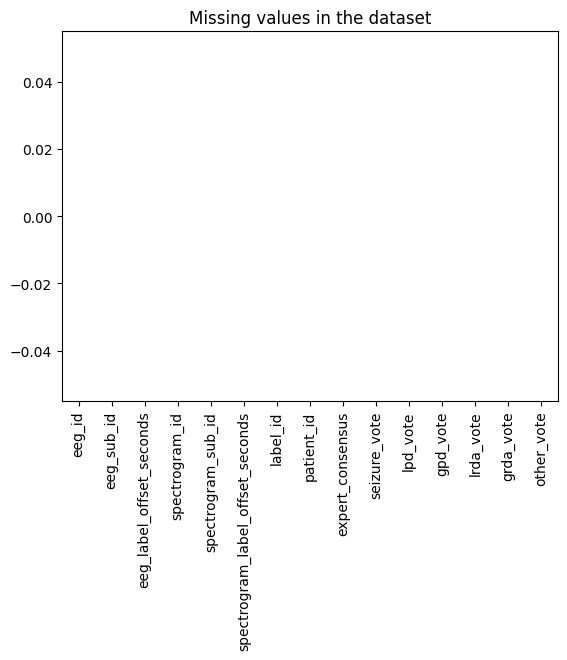

In [6]:
train_data.isna().sum().plot(kind='bar')
plt.title('Missing values in the dataset')
plt.show()

# Missing values before preprocessing:


In [7]:
# Data preprocessing steps

# 1. Handling missing values (if any)
print("Missing values before preprocessing:")
print(train_data.isnull().sum())

Missing values before preprocessing:
eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64


# Check for duplicated columns


In [8]:
train_data.duplicated().sum()

0

# Visualizing the Data

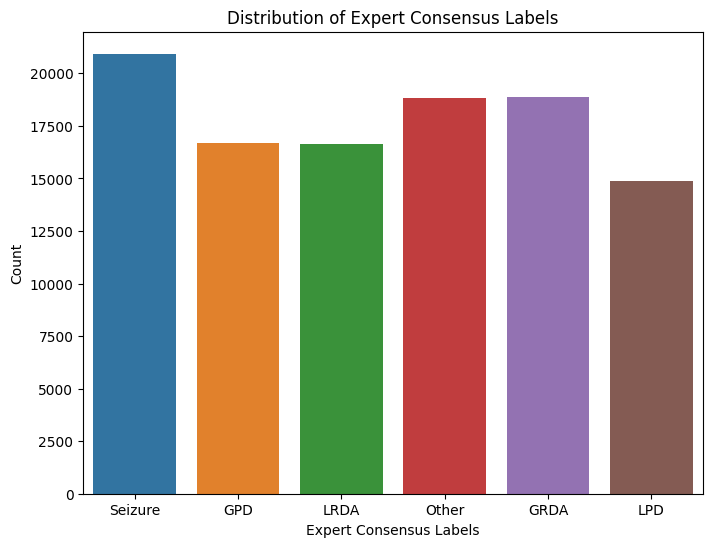

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for each bar
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='expert_consensus', data=train_data, palette=custom_colors)
plt.title('Distribution of Expert Consensus Labels')
plt.xlabel('Expert Consensus Labels')
plt.ylabel('Count')
plt.show()

# Encode the `expert_consensus` column


In [10]:
# Encode the `expert_consensus` column
label_encoder = LabelEncoder()
train_data['expert_consensus'] = label_encoder.fit_transform(train_data['expert_consensus'])

In [11]:
train_data.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,5,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,5,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,5,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,5,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,5,3,0,0,0,0,0


# Creating   RandomForestClassifier and Decision Tree Models and comparing them


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset


In [13]:
train_data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [14]:
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'patient_id']]
y = train_data['expert_consensus']

# Split the dataset into training and testing sets


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling numerical features


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_encoded = pd.get_dummies(X_train, columns=['patient_id'])
X_test_encoded = pd.get_dummies(X_test, columns=['patient_id'])

# KNeighborsClassifier()

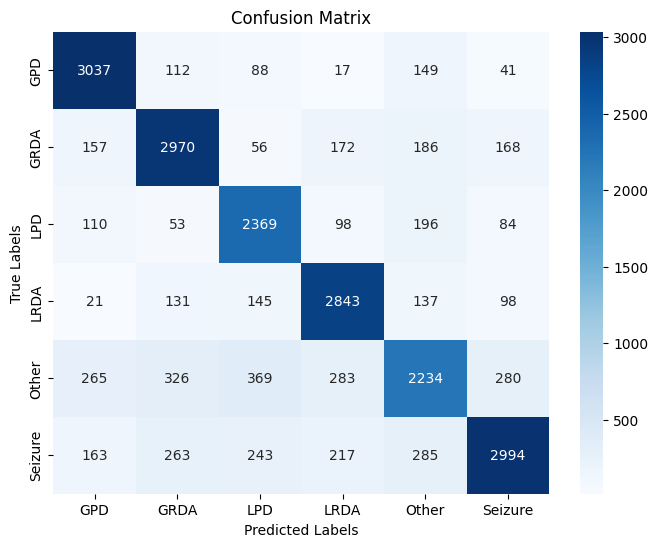

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have initialized and trained your KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  # Make sure you have fitted your classifier

# Make predictions
predictions = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Creating a model with Decision-Tree Algorithm

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Load the dataset
train_data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [21]:
# Select features and target variable
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote']]
y = train_data['expert_consensus']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

In [24]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Evaluate the performance of the trained model on the testing data
predictions = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8771067415730337


# RandomForestClassifier

In [26]:
import os
import tqdm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [27]:
# parent directory
PDIR = '/kaggle/input/hms-harmful-brain-activity-classification'

In [28]:
# Reading the CSV file 'train.csv' located in the directory specified by PDIR
df = pd.read_csv(os.path.join(PDIR, 'train.csv'))
# Load the dataset
train_data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

# Displaying the first few rows of the DataFrame
display(df.head())

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [29]:
# Select features and target variable
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote']]
y = train_data['expert_consensus']

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf_Model = RandomForestClassifier()

In [32]:
rf_Model.fit(X_train,y_train)


RandomForestClassifier()

In [33]:
print (f'Train Accuracy - : {rf_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.921
Test Accuracy - : 0.879


# Setting the sampling frequency and duration for EEG data collection

In [34]:

sampling_frequency = 200  # Sampling frequency in Hz
data_collection_duration = 50  # Duration of EEG data collection in seconds
total_samples = sampling_frequency * data_collection_duration  # Total number of samples in the duration

# Setting the number of training data points
num_train_data_points = 500  

# Creating an empty DataFrame to store training data
training_data_df = pd.DataFrame()

# Iterating over each training data point
for i in tqdm.tqdm(range(num_train_data_points)):
    # Loading EEG data for a specified eeg_id
    eeg_id = df.loc[i, 'eeg_id']
    eeg_data = pd.read_parquet(os.path.join(PDIR, 'train_eegs', f'{eeg_id}.parquet'))
    
    # Extracting EEG data from the Cz electrode for 50 seconds
    label_offset_time = df.loc[i, 'eeg_label_offset_seconds']  # Offset time for the EEG label
    label_offset_index = int(sampling_frequency * label_offset_time)  # Calculating offset index
    cz_electrode_data = eeg_data['Cz'][label_offset_index:label_offset_index + total_samples]  # Extracting data for Cz electrode
    
    # Adding the extracted data as a row to the training DataFrame
    training_data_df = pd.concat([training_data_df, cz_electrode_data.reset_index(drop=True).to_frame().transpose()], axis=0)

100%|██████████| 500/500 [00:11<00:00, 44.25it/s]


# Prepare features (X_train) and target variable (y_train)

In [35]:
# Adding diagnosis results
training_data_df['expert_consensus'] = df[:num_train_data_points]['expert_consensus'].values

# Removing rows with missing values
training_data_df = training_data_df.dropna()
training_data_df = training_data_df.reset_index(drop=True)

# Separating data into features and target
y_train = training_data_df['expert_consensus']
X_train = training_data_df.drop('expert_consensus', axis=1)

# Displaying the first few rows of the feature  dataset
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-90.389999,-92.290001,-99.360001,-102.059998,-102.339996,-110.010002,-116.750000,-119.589996,-125.669998,-130.449997,...,-155.089996,-147.919998,-147.800003,-148.600006,-151.929993,-155.830002,-158.360001,-155.119995,-146.800003,-149.880005
1,-112.110001,-107.370003,-104.839996,-95.480003,-85.459999,-90.580002,-83.879997,-78.959999,-88.379997,-88.120003,...,-100.250000,-110.709999,-104.199997,-138.100006,-119.809998,-129.869995,-158.889999,-168.910004,-108.779999,-112.529999
2,-104.110001,-106.080002,-101.510002,-99.449997,-100.690002,-105.750000,-111.870003,-118.680000,-131.229996,-130.729996,...,-113.589996,-129.960007,-115.879997,-130.809998,-128.110001,-115.610001,-123.510002,-111.980003,-121.190002,-104.230003
3,-102.570000,-105.430000,-107.839996,-103.570000,-102.209999,-103.209999,-104.650002,-110.830002,-112.779999,-114.830002,...,-33.959999,-37.450001,-44.020000,-26.690001,-30.280001,-47.490002,-36.660000,-32.709999,-45.189999,-38.779999
4,-140.699997,-141.720001,-143.240005,-142.779999,-142.960007,-142.880005,-137.979996,-127.849998,-127.879997,-123.419998,...,-111.209999,-103.180000,-95.430000,-93.209999,-90.269997,-94.730003,-92.769997,-81.360001,-73.510002,-74.540001


# Train RandomForestClassifier()


In [36]:
# Initializing a RandomForestClassifier with a random state of 0
forest = RandomForestClassifier(random_state=0)

# Fitting the classifier to the training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Reading the CSV file 'test.csv' located in the directory specified by PDIR

In [37]:

df_test = pd.read_csv(os.path.join(PDIR, 'test.csv'))

# Displaying the first few rows of the DataFrame
display(df_test.head())

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


# Creating an empty DataFrame to store testing data

In [38]:

X_test = pd.DataFrame()

# Iterating over each test data point
for i in tqdm.tqdm(range(len(df_test))):
    # Loading EEG data for a specified eeg_id
    eeg_id_ = df_test.loc[i, 'eeg_id']
    tmp = pd.read_parquet(os.path.join(PDIR, 'test_eegs', f'{eeg_id_}.parquet'))
    
    # Extracting EEG data from the Cz electrode
    cz_electrode_data = tmp['Cz']
    
    # Adding the extracted data as a row to the testing DataFrame
    X_test = pd.concat([X_test, cz_electrode_data.reset_index(drop=True).to_frame().transpose()], axis=0)

100%|██████████| 1/1 [00:00<00:00, 28.69it/s]


# Calculate predictions using the trained RandomForestClassifier model


In [39]:
predictions = forest.predict_proba(X_test)

# Read the sample submission file
submission = pd.read_csv(f'{PDIR}/sample_submission.csv')

# Iterate over each test data point
for i in tqdm.tqdm(range(len(df_test))):
    # Set the 'eeg_id' in the submission DataFrame
    submission.loc[i, 'eeg_id'] = df_test.loc[i, 'eeg_id']
    
    # Set the probability for each class in the submission DataFrame
    for j, cls_name in enumerate(forest.classes_):
        submission.loc[i, f'{cls_name.lower()}_vote'] = predictions[i, j]

100%|██████████| 1/1 [00:00<00:00, 390.93it/s]


# Display the submission DataFrame

In [40]:
display(submission)

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.2,0.0,0.36,0.04,0.13,0.27


# Saving the submission DataFrame to a CSV file without including the index


In [41]:
submission.to_csv('submission.csv', index=False)